In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv("Student_Performance.csv")


df = df.drop("student_id", axis=1)


y = df["final_grade"]


X = df.drop(["final_grade", "overall_score"], axis=1)


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_processed, y_train)

print("Accuracy:", model.score(X_test_processed, y_test))


pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))

print("New model & preprocessor saved successfully ✅")


Accuracy: 0.8822
New model & preprocessor saved successfully ✅


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Better styling
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Increase default figure size
plt.rcParams["figure.figsize"] = (8,5)

# Load dataset
df = pd.read_csv("Student_Performance.csv")

df.head()


,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


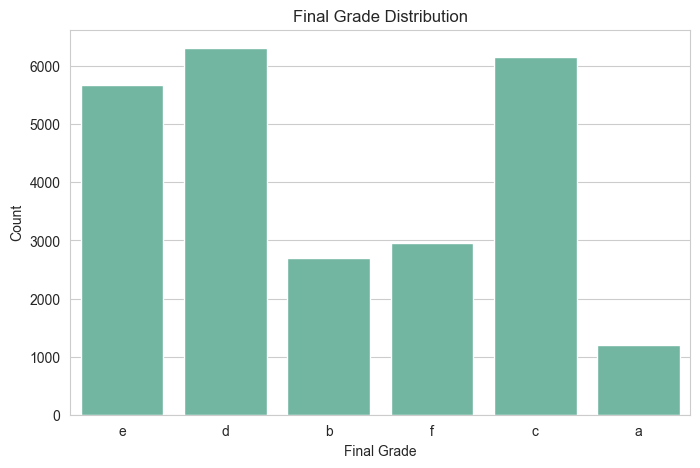

In [2]:
plt.figure()
sns.countplot(x="final_grade", data=df)
plt.title("Final Grade Distribution")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()


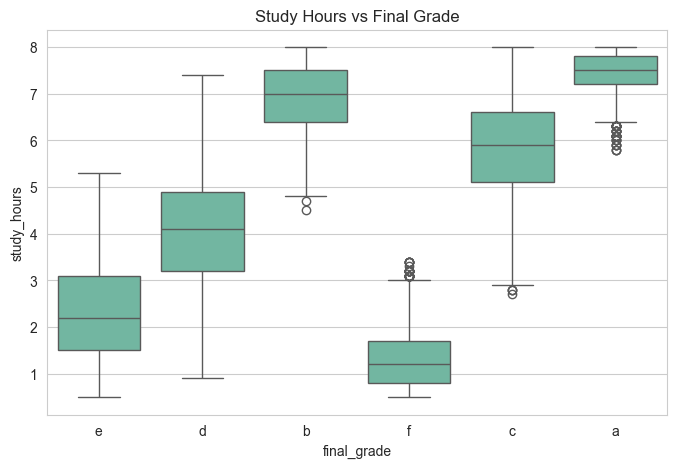

In [3]:
plt.figure()
sns.boxplot(x="final_grade", y="study_hours", data=df)
plt.title("Study Hours vs Final Grade")
plt.show()


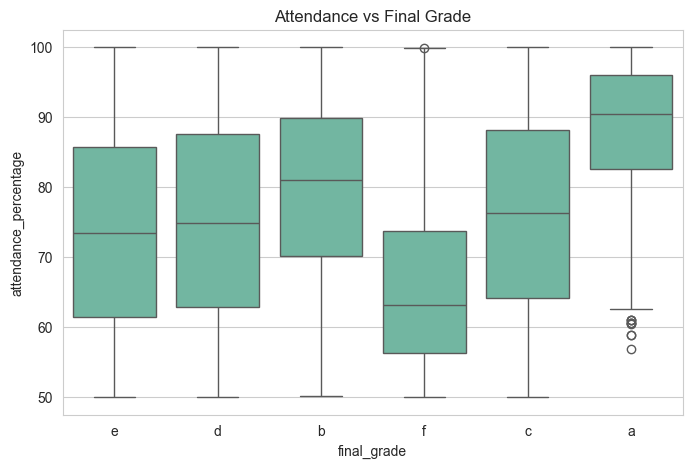

In [4]:
plt.figure()
sns.boxplot(x="final_grade", y="attendance_percentage", data=df)
plt.title("Attendance vs Final Grade")
plt.show()


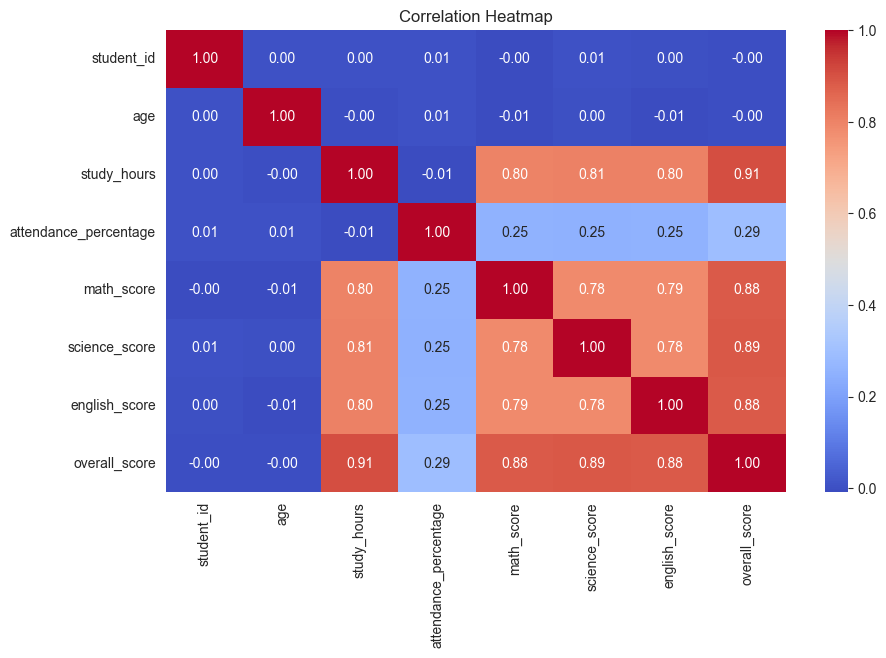

In [5]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


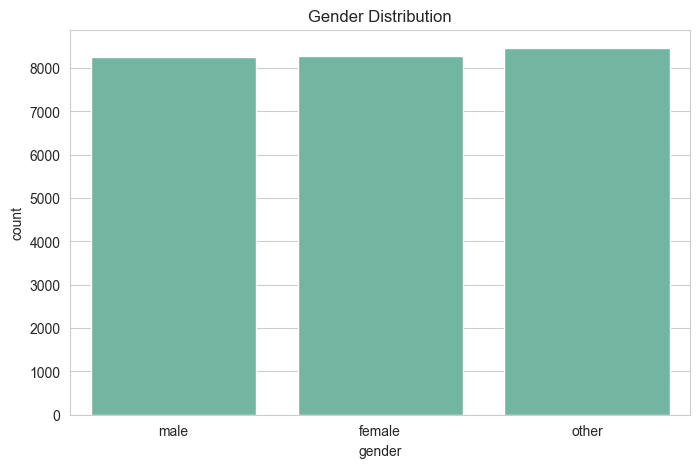

In [6]:
plt.figure()
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")
plt.show()


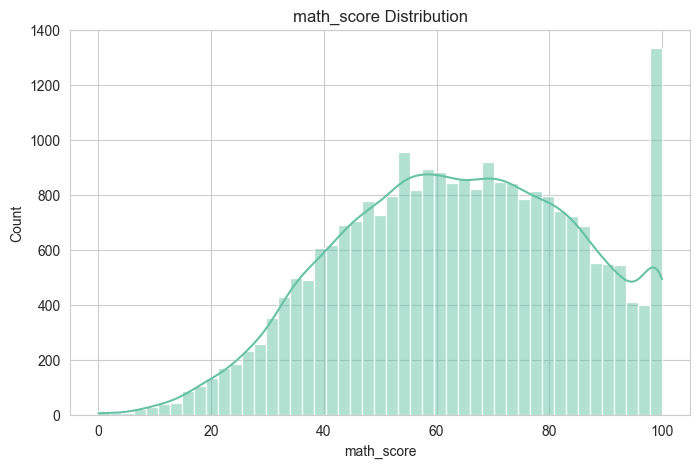

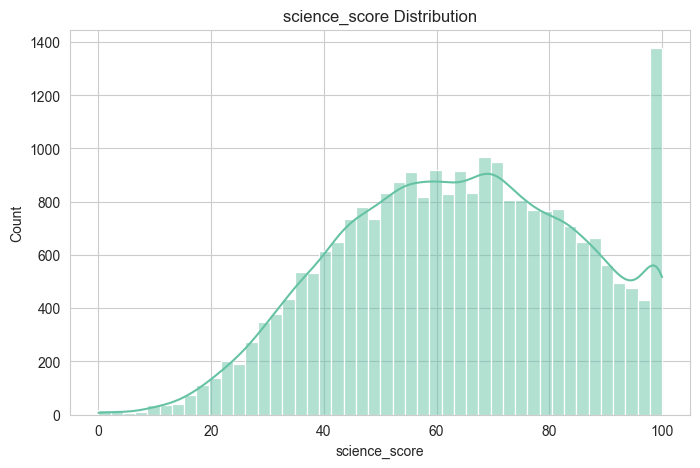

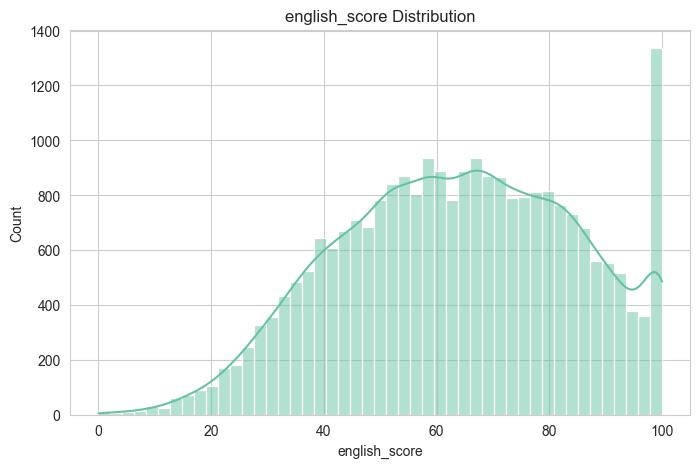

In [7]:
subjects = ["math_score", "science_score", "english_score"]

for subject in subjects:
    plt.figure()
    sns.histplot(df[subject], kde=True)
    plt.title(f"{subject} Distribution")
    plt.show()


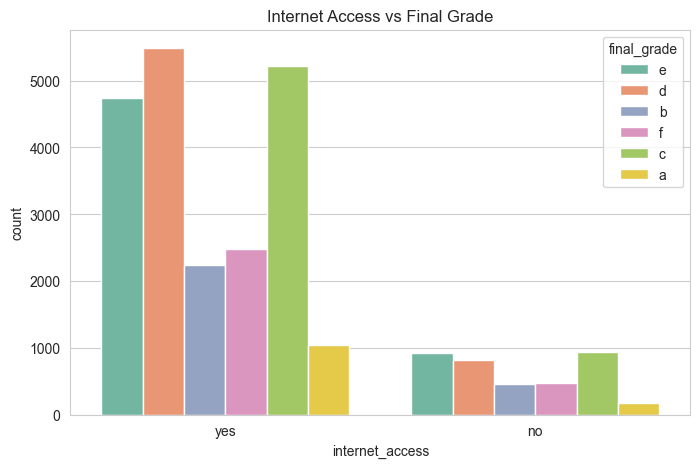

In [8]:
plt.figure()
sns.countplot(x="internet_access", hue="final_grade", data=df)
plt.title("Internet Access vs Final Grade")
plt.show()


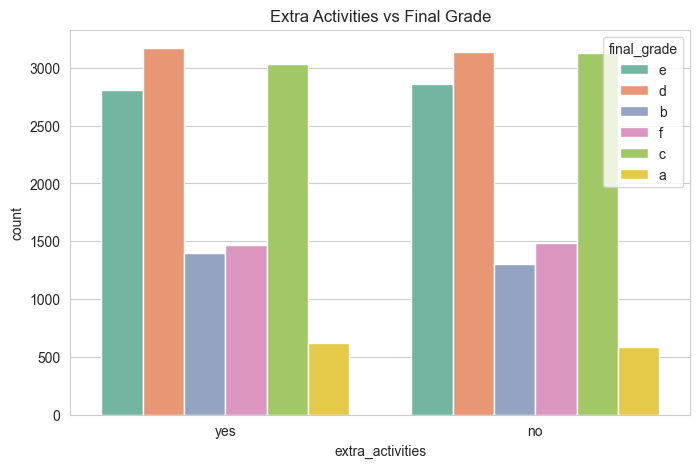

In [9]:
plt.figure()
sns.countplot(x="extra_activities", hue="final_grade", data=df)
plt.title("Extra Activities vs Final Grade")
plt.show()
